In [1]:
import bs4  
from bs4 import BeautifulSoup  
import pandas as pd
import scipy as sc
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
dataSet=pd.read_csv('dataSet.csv').iloc[:,1:]
dataSet

,Main Category,Category,Product name,Brand,Rating,Price,Link
0,Makeup,Face,Kylighter,KYLIE COSMETICS,3.6,$8.00,https://www.ulta.com/p/kylighter-pimprod2007188
1,Makeup,Face,Shape Tape Concealer,Tarte,4.5,$27.00,https://www.ulta.com/p/shape-tape-concealer-xl...
2,Makeup,Face,Skin Concealer,KYLIE COSMETICS,3.7,$5.00,https://www.ulta.com/p/skin-concealer-pimprod2...
3,Makeup,Face,CC+ Cream with SPF 50+,It Cosmetics,4.3,$39.50,https://www.ulta.com/p/cc-cream-with-spf-50-xl...
4,Makeup,Face,Double Wear Stay-in-Place Makeup,Estée Lauder,4.6,$43.00,https://www.ulta.com/p/double-wear-stay-in-pla...
...,...,...,...,...,...,...,...
15576,Men,Hair,Cedarwood Grooming Paste,Every Man Jack,0.0,$9.99,https://www.ulta.com/p/cedarwood-grooming-past...
15577,Men,Hair,Daily Hydrator Hair Styling Cream,Frederick Benjamin,5.0,$12.00,https://www.ulta.com/p/daily-hydrator-hair-sty...
15578,Men,Gifts & Value Sets,Wicked Beard Trio,Billy Jealousy,4.5,$24.00,https://www.ulta.com/p/wicked-beard-trio-xlsIm...
15579,Men,Gifts & Value Sets,Deluxe Grooming Kit,American Crew,0.0,$23.50,https://www.ulta.com/p/deluxe-grooming-kit-pim...


The categories on the site and the amount of products in each category:

Text(0, 0.5, 'Amount of product')

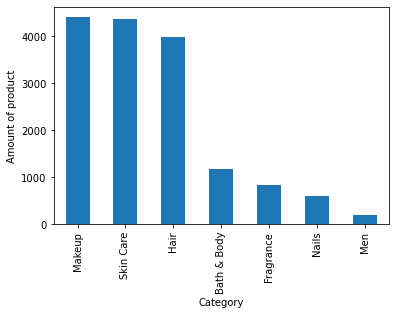

In [3]:
dataSet['Main Category'].value_counts()
dataSet['Main Category'].value_counts().plot(kind='bar') 
plt.xlabel('Category')
plt.ylabel('Amount of product')

In [4]:
replace_map={'Makeup':1,'Nails':2,'Skin Care':3,'Hair':4,'Fragrance':5,'Bath & Body':6,'Men':7}
dataSet_copy=dataSet.copy()
dataSet_copy.replace(replace_map,inplace=True)

Text(0, 0.5, ' ')

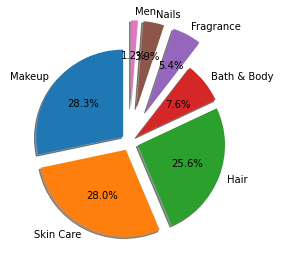

In [5]:
labels='Makeup','Skin Care','Hair','Bath & Body','Fragrance','Nails','Men'
explode = (0.1, 0.1, 0.1, 0.1,0.4, 0.4, 0.4)

tmp=dataSet_copy['Main Category'].value_counts(normalize=True)
tmp.plot.pie(explode=explode,labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,normalize=True)
plt.ylabel(' ')

Distribution of products in each category and their rating:

Text(0, 0.5, 'Rating')

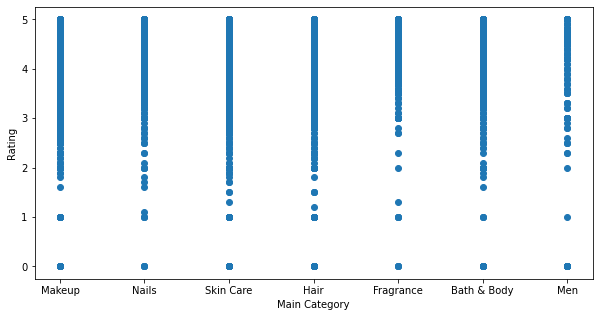

In [6]:
fig1, ax =plt.subplots(1,1,figsize=(10,5)) #מראה את דירוג המוצרים מול קטגוריה- קטגוריה בישום יותר פופולרית
ax.scatter(dataSet['Main Category'],dataSet['Rating'])
plt.xlabel('Main Category')
plt.ylabel('Rating')

We change the string value of 'Price' column in to numric value, and We will divide the data into groups to reduce the price range by useing the function pd.cut

In [7]:
tmp=[]
for i,row in dataSet.iterrows():
    tmp.append(row['Price'].strip("$"))

dataSet['Price_binned'] = tmp
dataSet['Price_binned'] = pd.to_numeric(dataSet['Price_binned'],errors='coerce')
dataSet=dataSet.dropna()

In [8]:
bins = [0,20,40,60,120]
labels = ['0-20$','20-40$','40-60$','60$ and up']#,'80-90$']
dataSet['Price_binned'] = pd.cut(dataSet['Price_binned'], bins, labels=labels)

dataSet

<ipython-input-8-388ae3e0c8f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet['Price_binned'] = pd.cut(dataSet['Price_binned'], bins, labels=labels)


,Main Category,Category,Product name,Brand,Rating,Price,Link,Price_binned
0,Makeup,Face,Kylighter,KYLIE COSMETICS,3.6,$8.00,https://www.ulta.com/p/kylighter-pimprod2007188,0-20$
1,Makeup,Face,Shape Tape Concealer,Tarte,4.5,$27.00,https://www.ulta.com/p/shape-tape-concealer-xl...,20-40$
2,Makeup,Face,Skin Concealer,KYLIE COSMETICS,3.7,$5.00,https://www.ulta.com/p/skin-concealer-pimprod2...,0-20$
3,Makeup,Face,CC+ Cream with SPF 50+,It Cosmetics,4.3,$39.50,https://www.ulta.com/p/cc-cream-with-spf-50-xl...,20-40$
4,Makeup,Face,Double Wear Stay-in-Place Makeup,Estée Lauder,4.6,$43.00,https://www.ulta.com/p/double-wear-stay-in-pla...,40-60$
...,...,...,...,...,...,...,...,...
15576,Men,Hair,Cedarwood Grooming Paste,Every Man Jack,0.0,$9.99,https://www.ulta.com/p/cedarwood-grooming-past...,0-20$
15577,Men,Hair,Daily Hydrator Hair Styling Cream,Frederick Benjamin,5.0,$12.00,https://www.ulta.com/p/daily-hydrator-hair-sty...,0-20$
15578,Men,Gifts & Value Sets,Wicked Beard Trio,Billy Jealousy,4.5,$24.00,https://www.ulta.com/p/wicked-beard-trio-xlsIm...,20-40$
15579,Men,Gifts & Value Sets,Deluxe Grooming Kit,American Crew,0.0,$23.50,https://www.ulta.com/p/deluxe-grooming-kit-pim...,20-40$


In [9]:
dataSet['Brand'].value_counts()

ULTA                  455
Clinique              248
Pacifica              209
Tarte                 198
e.l.f. Cosmetics      186
                     ... 
Jean Paul Gaultier      1
Neuma                   1
DKNY                    1
Nair                    1
RapidHair               1
Name: Brand, Length: 611, dtype: int64

We will focus on the 10 most common brands, in order to "avoid background noise" and better examine the connection between the product brand and its price, category and rating.

In [10]:
fregBrands=dataSet['Brand'].value_counts()[:10].sort_index(ascending=True)
fregBrands

Clinique                   248
Hempz                      155
Kiss                       142
L'Oréal                    154
Morphe                     169
NYX Professional Makeup    183
Pacifica                   209
Tarte                      198
ULTA                       455
e.l.f. Cosmetics           186
Name: Brand, dtype: int64

In [11]:
tmp=[]

for i, row in dataSet.iterrows():
    if row['Brand'] in fregBrands: tmp.append(row['Brand']) 
    else: tmp.append(None) #we reduce the brands
        
dataSet_byTopBrandName=pd.DataFrame(data={'Top brands':tmp})
dataSet_byTopBrandName['Main Category']=dataSet['Main Category']
dataSet_byTopBrandName['Price_binned']=dataSet['Price_binned']

In [12]:
bins = [2,3,4,5]
labels = [3,4,5]

dataSet_byTopBrandName['Rating'] = pd.cut(dataSet['Rating'], bins, labels=labels)
dataSet_byTopBrandName=dataSet_byTopBrandName.dropna()
dataSet_byTopBrandName

,Top brands,Main Category,Price_binned,Rating
1,Tarte,Makeup,20-40$,5
17,Tarte,Makeup,20-40$,5
23,Clinique,Makeup,20-40$,5
25,Tarte,Makeup,20-40$,5
28,Tarte,Makeup,20-40$,5
...,...,...,...,...
14236,Clinique,Bath & Body,0-20$,5
14239,Clinique,Bath & Body,0-20$,5
14241,Clinique,Bath & Body,0-20$,5
14275,Clinique,Bath & Body,0-20$,5


Examine the connection between Rating and Main Category

Text(0, 0.5, 'Amount of products')

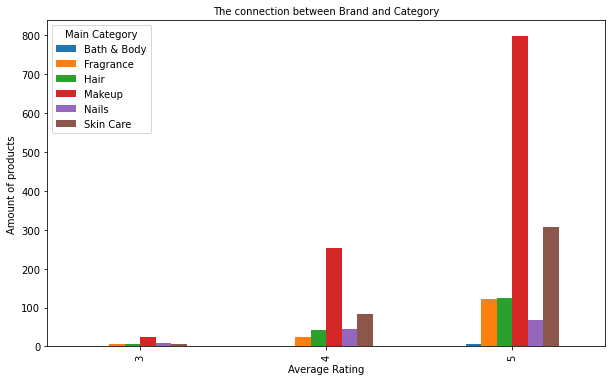

In [13]:
crosstab1=pd.crosstab(dataSet_byTopBrandName['Rating'],dataSet_byTopBrandName['Main Category'])
crosstab1.plot(kind='bar',figsize=(10,6))
plt.title("The connection between Brand and Category", fontsize= 10)
plt.xlabel('Average Rating')
plt.ylabel('Amount of products')

To examine the connection between those columns(between brand,price,category and rating) we will cross-reference data by using
pd.crosstab function

Text(0, 0.5, 'Amount of products')

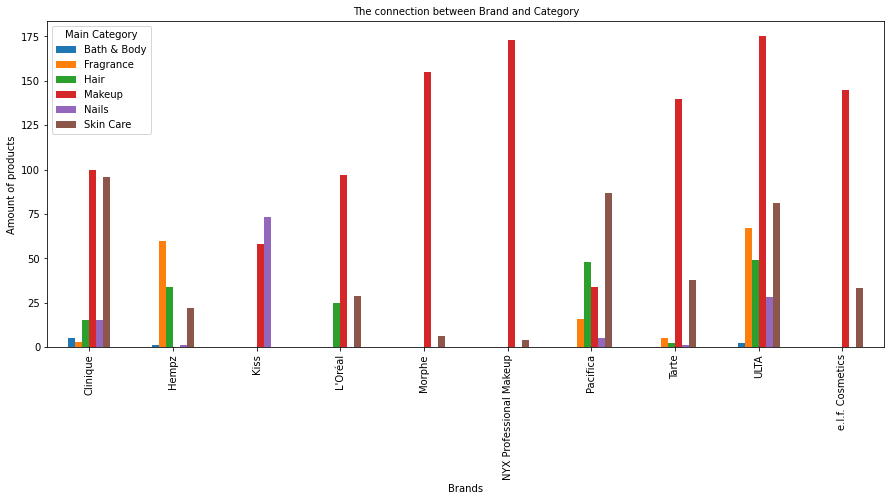

In [14]:
crosstab2=pd.crosstab(dataSet_byTopBrandName['Top brands'],dataSet_byTopBrandName['Main Category'])
crosstab2.plot(kind='bar',figsize=(15,6))
plt.title("The connection between Brand and Category", fontsize= 10)
plt.xlabel('Brands')
plt.ylabel('Amount of products')

Text(0, 0.5, 'Amount of products')

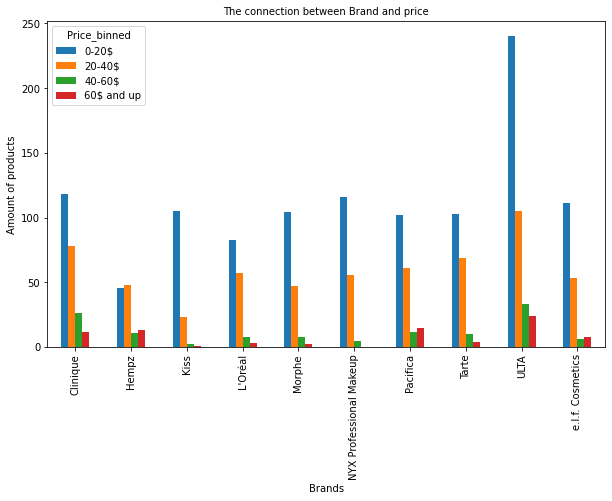

In [15]:
crosstab3=pd.crosstab(dataSet_byTopBrandName['Top brands'],dataSet_byTopBrandName['Price_binned'])
crosstab3.plot(kind='bar',figsize=(10,6))#אנחנו מראים את כמות המוצרים והמחירים בכול מותג
plt.title("The connection between Brand and price", fontsize= 10)
plt.xlabel('Brands')
plt.ylabel('Amount of products')

Text(0, 0.5, 'Amount of products')

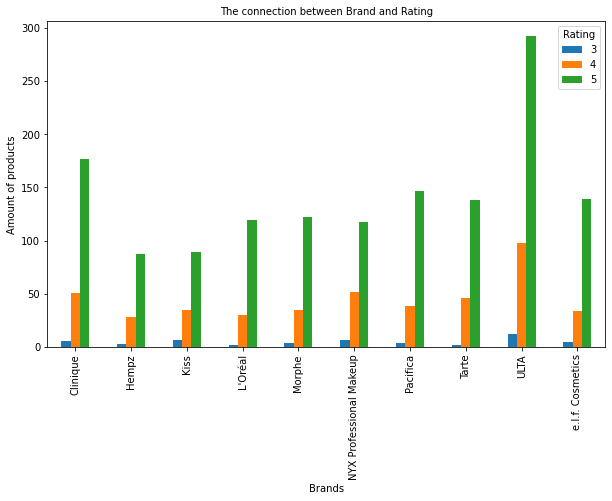

In [16]:
crosstab4=pd.crosstab(dataSet_byTopBrandName['Top brands'],dataSet_byTopBrandName['Rating'])
crosstab4.plot(kind='bar',figsize=(10,6))#אנחנו מראים את כמות המוצרים והמחירים בכול מותג
plt.title("The connection between Brand and Rating", fontsize= 10)
plt.xlabel('Brands')
plt.ylabel('Amount of products')

In the following cells, we will examine the distribution of products in the 10 common brands by their rating:

In [17]:
crosstab5=pd.crosstab(dataSet_byTopBrandName['Rating'],dataSet_byTopBrandName['Top brands'])
crosstab5

Top brands,Clinique,Hempz,Kiss,L'Oréal,Morphe,NYX Professional Makeup,Pacifica,Tarte,ULTA,e.l.f. Cosmetics
Rating,,,,,,,,,,
3,6,3,7,2,4,7,4,2,12,5
4,51,28,35,30,35,52,39,46,98,34
5,177,87,89,119,122,118,147,138,292,139


array([<AxesSubplot:ylabel='Clinique'>], dtype=object)

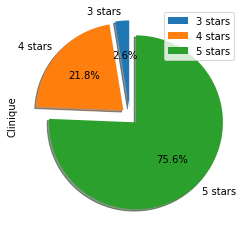

In [18]:
labels='3 stars','4 stars','5 stars'
explode = (0.1, 0.1, 0.1)

#Clinique divide by the rating 
crosstab5.iloc[:,:1].plot.pie(subplots=True,labels=labels,explode=explode,autopct='%1.1f%%',shadow=True,startangle=90,normalize=True)

array([<AxesSubplot:ylabel='Hempz'>], dtype=object)

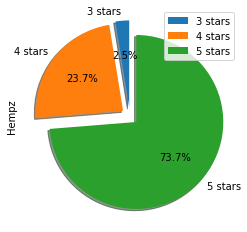

In [19]:
labels='3 stars','4 stars','5 stars'
explode = (0.1, 0.1, 0.1)

crosstab5.iloc[:,1:2].plot.pie(subplots=True,labels=labels,explode=explode,autopct='%1.1f%%',shadow=True,startangle=90,normalize=True)

array([<AxesSubplot:ylabel='Kiss'>], dtype=object)

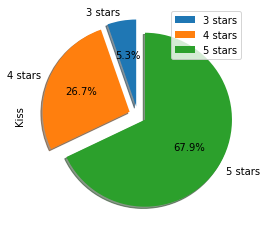

In [20]:
labels='3 stars','4 stars','5 stars'
explode = (0.1, 0.1, 0.1)

crosstab5.iloc[:,2:3].plot.pie(subplots=True,labels=labels,explode=explode,autopct='%1.1f%%',shadow=True,startangle=90,normalize=True)

array([<AxesSubplot:ylabel="L'Oréal">], dtype=object)

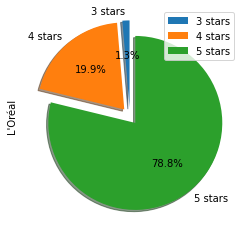

In [21]:
labels='3 stars','4 stars','5 stars'
explode = (0.1, 0.1, 0.1)

crosstab5.iloc[:6,3:4].plot.pie(subplots=True,labels=labels,explode=explode,autopct='%1.1f%%',shadow=True,startangle=90,normalize=True)

array([<AxesSubplot:ylabel='Morphe'>], dtype=object)

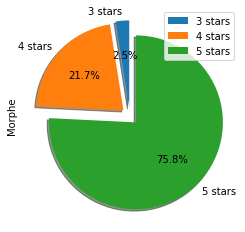

In [22]:
labels='3 stars','4 stars','5 stars'
explode = (0.1, 0.1, 0.1)

#ulta divide by the rating 
crosstab5.iloc[:6,4:5].plot.pie(subplots=True,labels=labels,explode=explode,autopct='%1.1f%%',shadow=True,startangle=90,normalize=True)


array([<AxesSubplot:ylabel='NYX Professional Makeup'>], dtype=object)

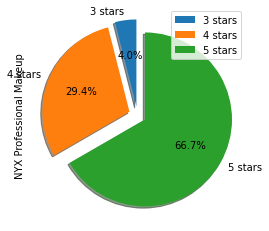

In [23]:
labels='3 stars','4 stars','5 stars'
explode = (0.1, 0.1, 0.1)

#ulta divide by the rating 
crosstab5.iloc[:6,5:6].plot.pie(subplots=True,labels=labels,explode=explode,autopct='%1.1f%%',shadow=True,startangle=90,normalize=True)

array([<AxesSubplot:ylabel='Pacifica'>], dtype=object)

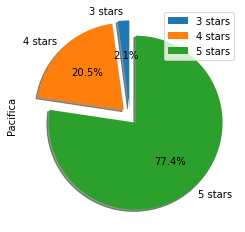

In [24]:
labels='3 stars','4 stars','5 stars'
explode = (0.1, 0.1, 0.1)

#ulta divide by the rating 
crosstab5.iloc[:6,6:7].plot.pie(subplots=True,labels=labels,explode=explode,autopct='%1.1f%%',shadow=True,startangle=90,normalize=True)

array([<AxesSubplot:ylabel='Tarte'>], dtype=object)

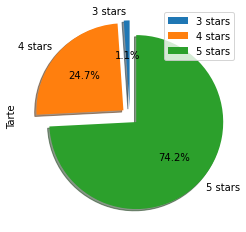

In [25]:
labels='3 stars','4 stars','5 stars'
explode = (0.1, 0.1, 0.1)

#ulta divide by the rating 
crosstab5.iloc[:6,7:8].plot.pie(subplots=True,labels=labels,explode=explode,autopct='%1.1f%%',shadow=True,startangle=90,normalize=True)

array([<AxesSubplot:ylabel='ULTA'>], dtype=object)

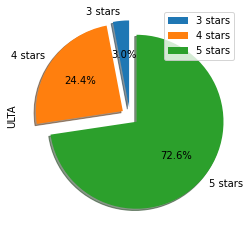

In [26]:
labels='3 stars','4 stars','5 stars'
explode = (0.1, 0.1, 0.1)

#ulta divide by the rating 
crosstab5.iloc[:6,8:9].plot.pie(subplots=True,labels=labels,explode=explode,autopct='%1.1f%%',shadow=True,startangle=90,normalize=True)

array([<AxesSubplot:ylabel='e.l.f. Cosmetics'>], dtype=object)

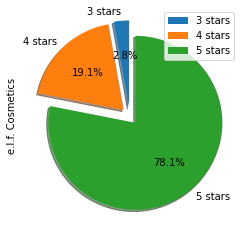

In [27]:
labels='3 stars','4 stars','5 stars'
explode = (0.1, 0.1, 0.1)

#ulta divide by the rating 
crosstab5.iloc[:6,9:10].plot.pie(subplots=True,labels=labels,explode=explode,autopct='%1.1f%%',shadow=True,startangle=90,normalize=True)